In [1]:
from __future__          import division
from scipy.stats         import logistic
import numpy             as np
import matplotlib.cm     as cm
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def get_gradient(X, Y, w):
    return np.dot(X.transpose(), 
                  Y * logistic.cdf(-1* Y * np.dot(X, w.transpose())))

def get_lositic_regression_loss(X, Y, w):
    loss_arr = np.log(logistic.cdf(Y * np.dot(X, w.transpose()))) * -1
    return loss_arr.sum()

def logistic_regression_gradient_descent(X, Y, 
                                         learning_rate=0.01, 
                                         threshold = 0.001):
    w = np.zeros(X[0].shape)
    losses = []
    i = 0
    while True:
        w = w + learning_rate * get_gradient(X, Y, w)
        loss = get_lositic_regression_loss(X, Y, w)
        losses.append(loss)
        if len(losses) >= 2 and \
            math.fabs(losses[-1]-losses[-2]) <= threshold:
            break
        i = i + 1
    print "Final Regression loss: " + str(losses[-1])
    print "Iterations: " + str(i)
    return w

In [3]:
def plot_decision_boundary(X, Y, fig="default.png"):
    X1 = [xx[0] for xx in X]
    X2 = [xx[1] for xx in X]
    X = np.array([np.insert(xx, 0, 1) for xx in X])
    w = logistic_regression_gradient_descent(X, Y)
    print "Weights :" ; print w
    print "Predictions: "
    print [1 if logistic.cdf(np.dot(w,xx)) > 0.5 
           else -1 
           for xx in X]
    plt.scatter(X1, X2, c=Y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.plot([0, -w[0]/w[1]], [-w[0]/w[2], 0])
    plt.show()
    plt.savefig(fig)

Final Regression loss: 0.981760073095
Iterations: 864
Weights :
[-4.97620372  1.60844967  0.1296038 ]
Predictions: 
[-1, -1, -1, 1, 1, 1]


C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


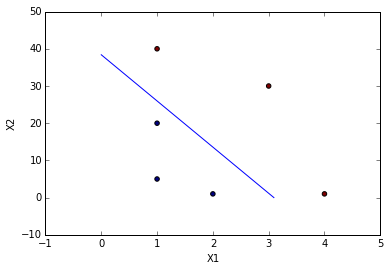

In [4]:
# B PART.
X = np.array(
        [np.array([2, 1]), 
         np.array([1, 20]),
         np.array([1, 5]),
         np.array([4, 1]), 
         np.array([1, 40]),
         np.array([3, 30])]
    )
Y = np.array([-1,-1,-1,1,1,1])
plot_decision_boundary(X, Y, "fig1.png")

Final Regression loss: 1.25642997575
Iterations: 821
Weights :
[-4.02840682  1.3597792   1.04597246]
Predictions: 
[-1, -1, -1, 1, 1, 1]


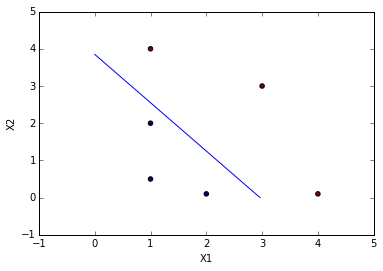

In [5]:
# C PART.
X_scaled = np.array(
        [np.array([2, 1/10]), 
         np.array([1, 20/10]),
         np.array([1, 5/10]),
         np.array([4, 1/10]), 
         np.array([1, 40/10]),
         np.array([3, 30/10])]
    )
Y = np.array([-1,-1,-1,1,1,1])
plot_decision_boundary(X_scaled, Y, "fig2.png")

Final Regression loss: 1.54590138923
Iterations: 1216
Weights :
[-12.81748824   2.81356871   1.09234822]
Predictions: 
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


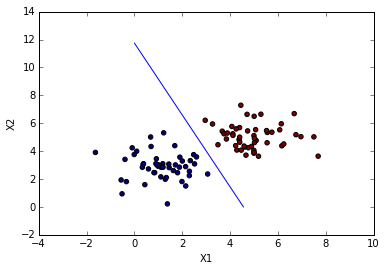

In [6]:
# D PART
from numpy.random import multivariate_normal

# Generate points of type -1 using bivaraite guassian.
X1, X2 = multivariate_normal(mean=[1,3], cov=[[1, 0],[0,1]], size=50).T
X_Label1 = [np.array(xx) for xx in zip(X1, X2)]

# Generate points of type 1 using bivaraite guassian.
X1, X2 = multivariate_normal(mean=[5,5], cov=[[1, 0],[0,1]], size=50).T
X_Label2 = [np.array(xx) for xx in zip(X1, X2)]

X  = np.array(X_Label1 + X_Label2)
Y = np.array([-1] * 50 + [1] * 50)

plot_decision_boundary(X, Y, "fig2.png")